In [1]:
import pickle

import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import seaborn as sns
from tqdm import tqdm

In [2]:
with open("/Volumes/PortableSSD/case_fix_advance_13_lumi/advance_times_and_cpu_temperatures_1648157851.pkl", "rb") as f:
    data = pickle.load(f)
times = np.array(data["advance_times"])
temperatures = np.array(data["cpu_temperatures"])

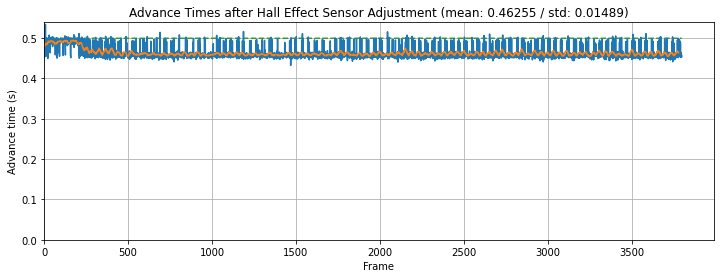

In [40]:
plt.figure(figsize=(12,4))
plt.plot([0.499175]*3800, ls="--", c="tab:green")
plt.plot(times)
plt.plot(np.convolve(times, np.ones(20), mode="valid") / 20)
plt.grid()
plt.title(f"Advance Times after Hall Effect Sensor Adjustment (mean: {times.mean():.5f} / std: {times.std():.5f})")
plt.xlabel("Frame")
plt.ylabel("Advance time (s)")
plt.xlim(0, None)
plt.ylim(0, None)
plt.show()

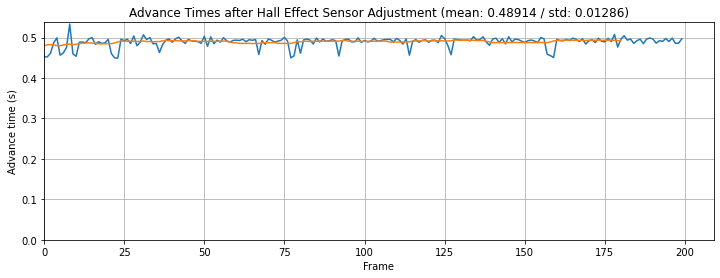

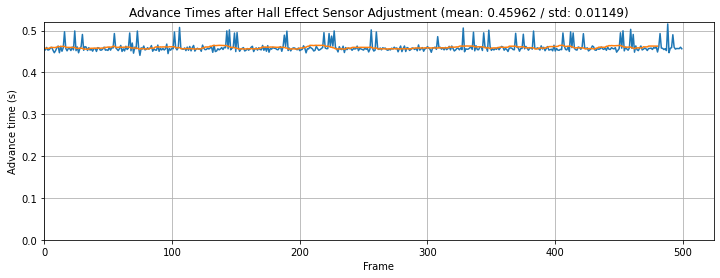

In [4]:
timesearly = times[:200]

plt.figure(figsize=(12,4))
plt.plot(timesearly)
plt.plot(np.convolve(timesearly, np.ones(20), mode="valid") / 20)
plt.grid()
plt.title(f"Advance Times after Hall Effect Sensor Adjustment (mean: {timesearly.mean():.5f} / std: {timesearly.std():.5f})")
plt.xlabel("Frame")
plt.ylabel("Advance time (s)")
plt.xlim(0, None)
plt.ylim(0, None)
plt.show()

times500 = times[700:1200]

plt.figure(figsize=(12,4))
plt.plot(times500)
plt.plot(np.convolve(times500, np.ones(20), mode="valid") / 20)
plt.grid()
plt.title(f"Advance Times after Hall Effect Sensor Adjustment (mean: {times500.mean():.5f} / std: {times500.std():.5f})")
plt.xlabel("Frame")
plt.ylabel("Advance time (s)")
plt.xlim(0, None)
plt.ylim(0, None)
plt.show()

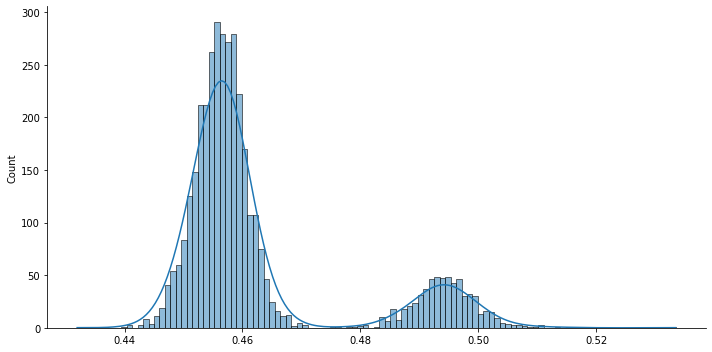

In [5]:
sns.displot(times, kde=True, aspect=2)
plt.show()

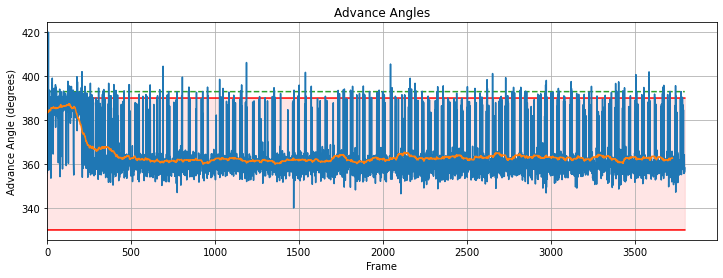

In [39]:
angles = times * 360 / np.median(times)
averaged_angles = (np.convolve(times, np.ones(75), mode="valid") / 75) * 360 / np.median(times)
programmed_limit_angle = 0.499175 * 360 / np.median(times)

plt.figure(figsize=(12,4))
plt.plot([360-30]*3800, c="red")
plt.plot([360+30]*3800, c="red")
plt.plot([programmed_limit_angle]*3800, ls="--", c="tab:green")
plt.fill_between(range(3800), [360-30]*3800, [360+30]*3800, color="red", alpha=0.1)
plt.plot(angles)
plt.plot(averaged_angles)
plt.grid()
plt.title("Advance Angles")
plt.xlabel("Frame")
plt.ylabel("Advance Angle (degrees)")
plt.xlim(0, None)
# plt.ylim(0, None)
plt.show()

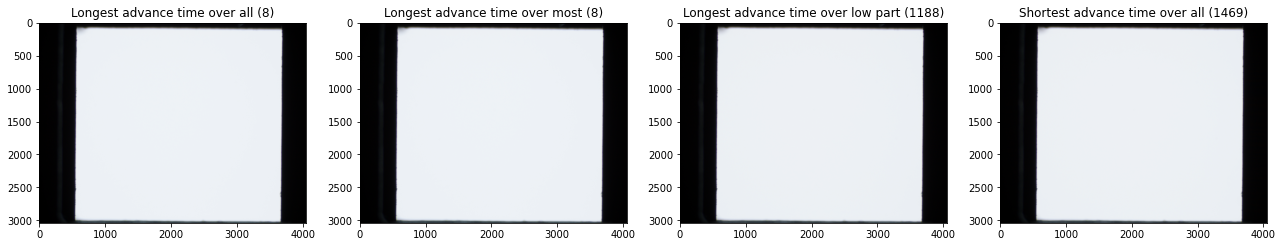

In [7]:
all_max = times.argmax()
path = f"case_fix_advance_12_lumi/frame-{all_max:05d}.jpg"
img_all_max = cv2.imread(path, cv2.IMREAD_COLOR)

almost_all_max = 2 + times[2:].argmax()
path = f"case_fix_advance_12_lumi/frame-{almost_all_max:05d}.jpg"
img_almost_all_max = cv2.imread(path, cv2.IMREAD_COLOR)

lower_max = 500 + times[500:].argmax()
path = f"case_fix_advance_12_lumi/frame-{lower_max:05d}.jpg"
img_lower_max = cv2.imread(path, cv2.IMREAD_COLOR)

all_min = times.argmin()
path = f"case_fix_advance_12_lumi/frame-{all_min:05d}.jpg"
img_all_min = cv2.imread(path, cv2.IMREAD_COLOR)

plt.figure(figsize=(22,7))
plt.subplot(1, 4, 1)
plt.title(f"Longest advance time over all ({all_max})")
plt.imshow(img_all_max)
plt.subplot(1, 4, 2)
plt.title(f"Longest advance time over most ({almost_all_max})")
plt.imshow(img_almost_all_max)
plt.subplot(1, 4, 3)
plt.title(f"Longest advance time over low part ({lower_max})")
plt.imshow(img_lower_max)
plt.subplot(1, 4, 4)
plt.title(f"Shortest advance time over all ({all_min})")
plt.imshow(img_all_min)
plt.show()

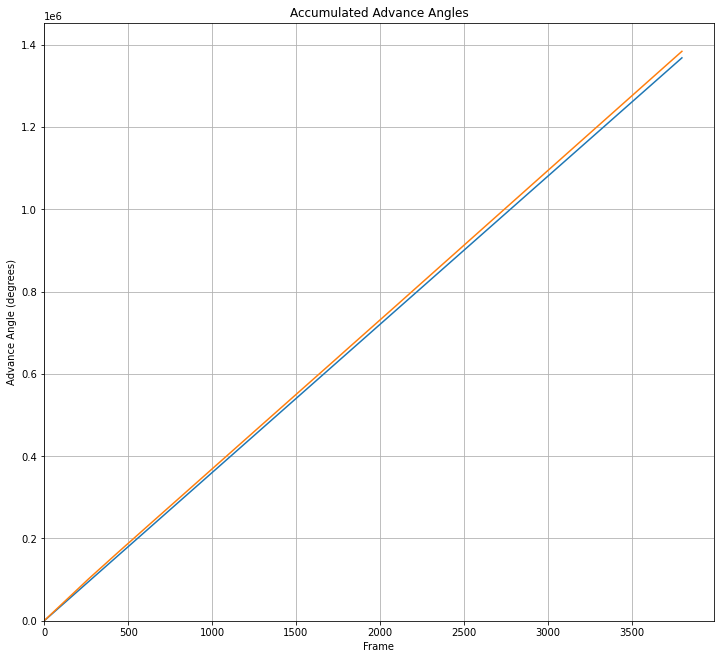

In [8]:
angles = times * 360 / np.median(times)
sum_angles = np.cumsum(angles)
correct_sum_angles = np.arange(0, 360*3800, step=360)

plt.figure(figsize=(12,11))
plt.plot(correct_sum_angles, label="Correct")
plt.plot(sum_angles, label="Actual")
# plt.fill_between(range(3800), [360-30]*3800, [360+30]*3800, color="red", alpha=0.1)
plt.grid()
plt.title("Accumulated Advance Angles")
plt.xlabel("Frame")
plt.ylabel("Advance Angle (degrees)")
plt.xlim(0, None)
plt.ylim(0, None)
plt.show()

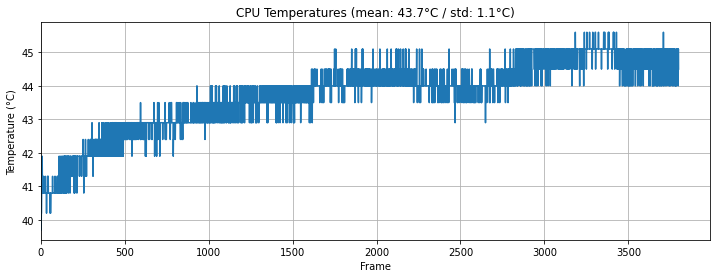

In [9]:
plt.figure(figsize=(12,4))
plt.plot(temperatures)
plt.grid()
plt.title(f"CPU Temperatures (mean: {temperatures.mean():.1f}°C / std: {temperatures.std():.1f}°C)")
plt.xlabel("Frame")
plt.ylabel("Temperature (°C)")
plt.xlim(0, None)
plt.show()

100%|██████████| 3800/3800 [05:31<00:00, 11.46it/s]


[0 1 2 3 4]


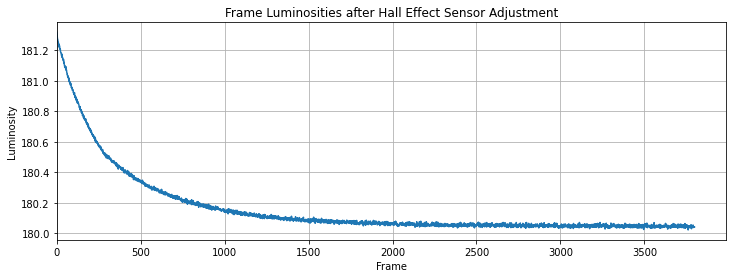

In [11]:
luminosities = []
for i in tqdm(range(3800)):
    path = f"case_fix_advance_13_lumi/frame-{i:05d}.jpg"
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    l = img.mean()
    luminosities.append(l)
luminosities = np.array(luminosities)

medlum = np.median(luminosities)
diffs = np.abs(luminosities - medlum)

ind = np.argpartition(diffs, -5)[-5:]
print(np.sort(ind))

plt.figure(figsize=(12,4))
plt.plot(luminosities)
plt.grid()
plt.title("Frame Luminosities after Hall Effect Sensor Adjustment")
plt.xlabel("Frame")
plt.ylabel("Luminosity")
plt.xlim(0, None)
# plt.ylim(0, None)
plt.show()

100%|██████████| 3800/3800 [05:55<00:00, 10.70it/s]


[0 1 2 3 6]


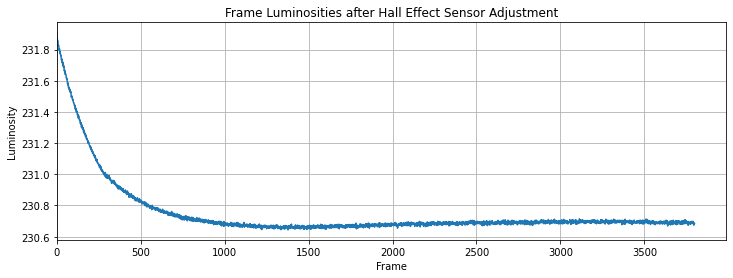

In [12]:
luminosities = []
for i in tqdm(range(3800)):
    path = f"case_fix_advance_13_lumi/frame-{i:05d}.jpg"
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    l = img[200:2800,700:3600].mean()
    luminosities.append(l)
luminosities = np.array(luminosities)

medlum = np.median(luminosities)
diffs = np.abs(luminosities - medlum)

ind = np.argpartition(diffs, -5)[-5:]
print(np.sort(ind))

plt.figure(figsize=(12,4))
plt.plot(luminosities)
plt.grid()
plt.title("Frame Luminosities after Hall Effect Sensor Adjustment")
plt.xlabel("Frame")
plt.ylabel("Luminosity")
plt.xlim(0, None)
# plt.ylim(0, None)
plt.show()

100%|██████████| 3800/3800 [14:16<00:00,  4.44it/s]


[0 1 2 3 6]


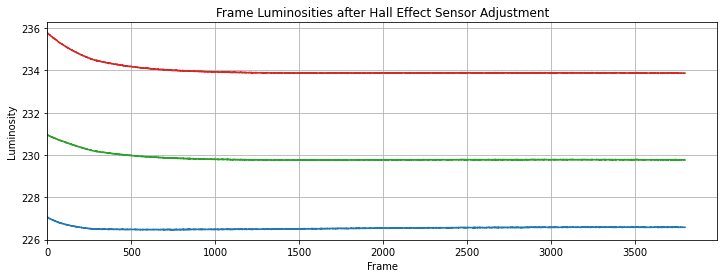

In [14]:
luminosities_r = []
luminosities_g = []
luminosities_b = []
for i in tqdm(range(3800)):
    path = f"case_fix_advance_13_lumi/frame-{i:05d}.jpg"
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    lr = img[200:2800,700:3600,2].mean()
    lg = img[200:2800,700:3600,1].mean()
    lb = img[200:2800,700:3600,0].mean()
    luminosities_r.append(lr)
    luminosities_g.append(lg)
    luminosities_b.append(lb)
luminosities_r = np.array(luminosities_r)
luminosities_g = np.array(luminosities_g)
luminosities_b = np.array(luminosities_b)

medlum = np.median(luminosities)
diffs = np.abs(luminosities - medlum)

ind = np.argpartition(diffs, -5)[-5:]
print(np.sort(ind))

plt.figure(figsize=(12,4))
plt.plot(luminosities_r, c="tab:red")
plt.plot(luminosities_g, c="tab:green")
plt.plot(luminosities_b, c="tab:blue")
plt.grid()
plt.title("Frame Luminosities after Hall Effect Sensor Adjustment")
plt.xlabel("Frame")
plt.ylabel("Luminosity")
plt.xlim(0, None)
# plt.ylim(0, None)
plt.show()

In [15]:
i = 0
path = f"case_fix_advance_13_lumi/frame-{i:05d}.jpg"
ref = cv2.imread(path, cv2.IMREAD_GRAYSCALE).astype("float")

max_diff = np.zeros_like(ref).astype("float")
for i in tqdm(range(1,3800)):
    path = f"case_fix_advance_13_lumi/frame-{i:05d}.jpg"
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE).astype("float")
    diff = np.abs(img - ref)
    max_diff = np.maximum(diff, max_diff)

100%|██████████| 3799/3799 [14:15<00:00,  4.44it/s]


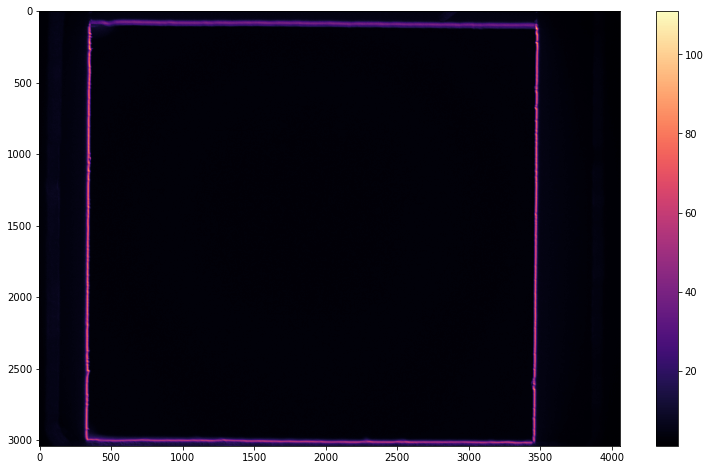

In [16]:
plt.figure(figsize=(13,8))
plt.imshow(max_diff, cmap="magma")
plt.colorbar()
plt.show()

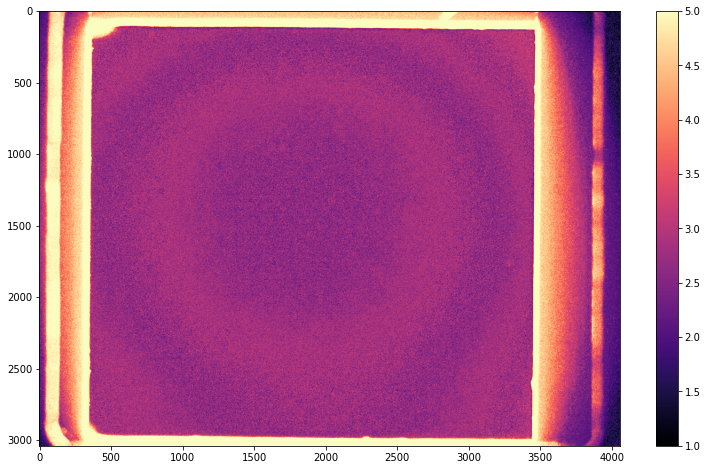

In [17]:
plt.figure(figsize=(13,8))
plt.imshow(np.clip(max_diff,0,5), cmap="magma")
plt.colorbar()
plt.show()

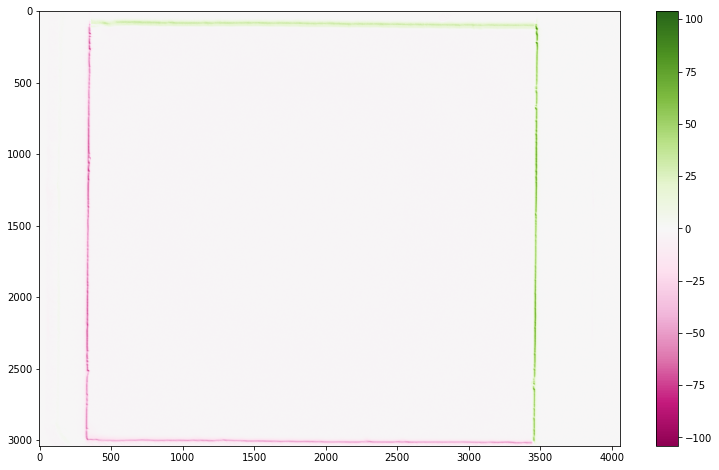

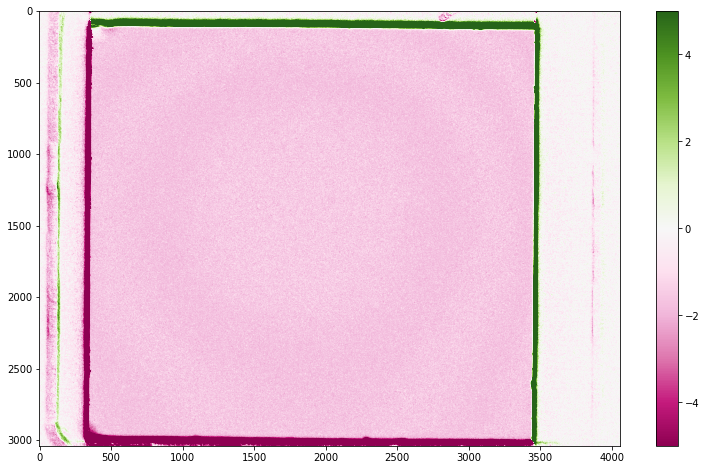

In [18]:
i = 0
path = f"case_fix_advance_13_lumi/frame-{i:05d}.jpg"
first = cv2.imread(path, cv2.IMREAD_GRAYSCALE).astype("float")

i = 3799
path = f"case_fix_advance_13_lumi/frame-{i:05d}.jpg"
last = cv2.imread(path, cv2.IMREAD_GRAYSCALE).astype("float")

img_time = last - first

plt.figure(figsize=(13,8))
plt.imshow(img_time, vmin=-np.abs(img_time).max(), vmax=np.abs(img_time).max(), cmap="PiYG")
plt.colorbar()
plt.show()

clip = 5
plt.figure(figsize=(13,8))
plt.imshow(img_time, vmin=-clip, vmax=clip, cmap="PiYG")
plt.colorbar()
plt.show()

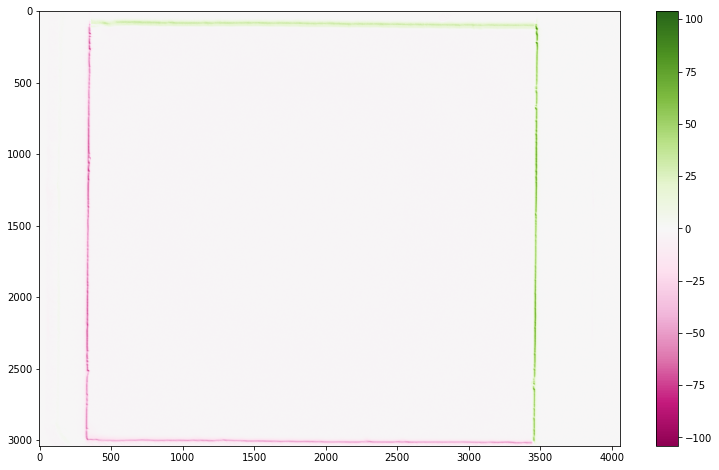

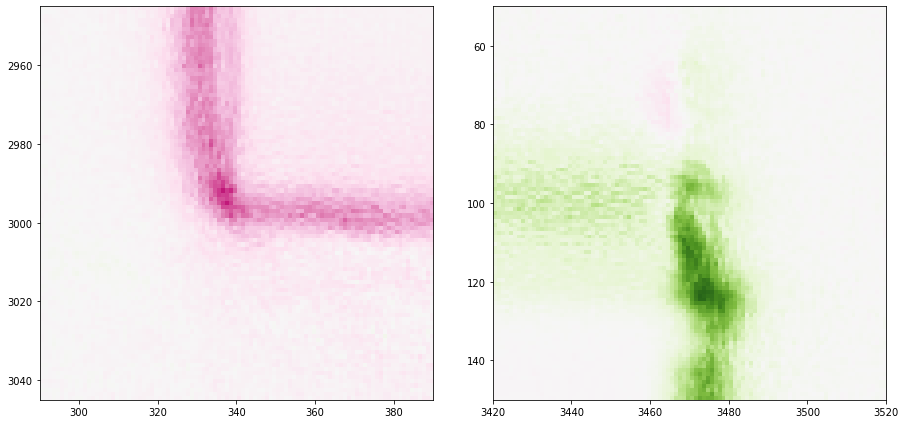

In [29]:
i = 0
path = f"case_fix_advance_13_lumi/frame-{i:05d}.jpg"
first = cv2.imread(path, cv2.IMREAD_GRAYSCALE).astype("float")

i = 3799
path = f"case_fix_advance_13_lumi/frame-{i:05d}.jpg"
last = cv2.imread(path, cv2.IMREAD_GRAYSCALE).astype("float")

img_time = last - first

plt.figure(figsize=(13,8))
plt.imshow(img_time, vmin=-np.abs(img_time).max(), vmax=np.abs(img_time).max(), cmap="PiYG")
plt.colorbar()
plt.show()

plt.figure(figsize=(13,6))
plt.subplot(1, 2, 1)
plt.imshow(img_time[2945:3045,290:390], vmin=-np.abs(img_time).max(), vmax=np.abs(img_time).max(), cmap="PiYG", extent=(290,390,3045,2945))
plt.subplot(1, 2, 2)
plt.imshow(img_time[50:150,3420:3520], vmin=-np.abs(img_time).max(), vmax=np.abs(img_time).max(), cmap="PiYG", extent=(3420,3520,150,50))
plt.tight_layout()
plt.show()

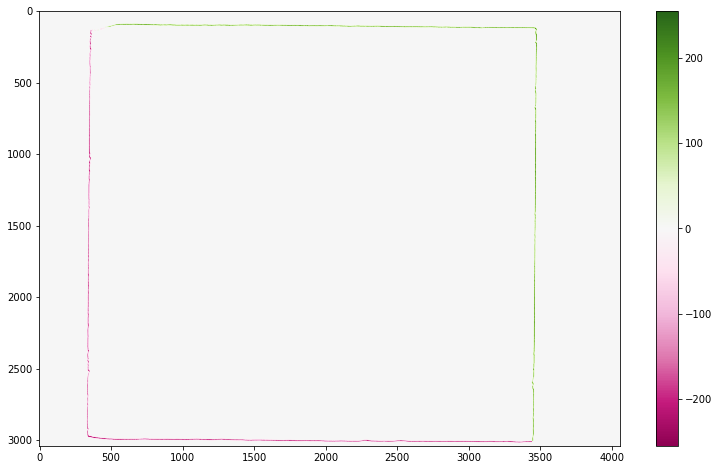

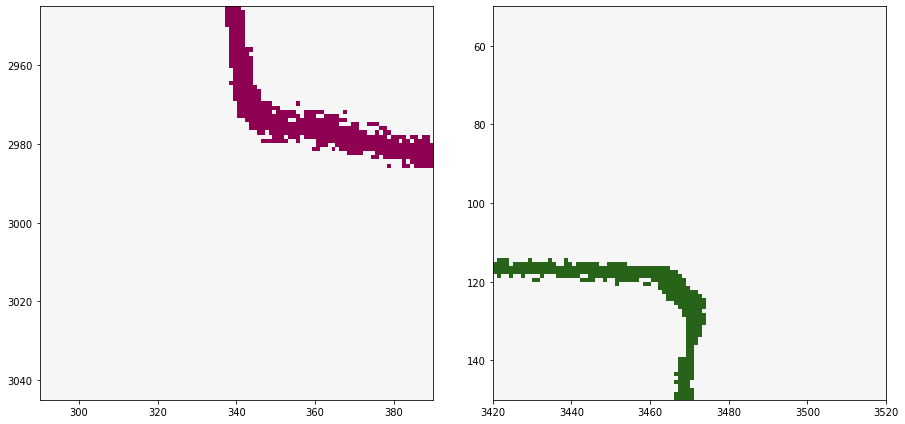

In [30]:
i = 0
path = f"case_fix_advance_13_lumi/frame-{i:05d}.jpg"
first = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
first = cv2.threshold(first, 200, 255, cv2.THRESH_BINARY)[1]
first = first.astype("float")

i = 3799
path = f"case_fix_advance_13_lumi/frame-{i:05d}.jpg"
last = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
last = cv2.threshold(last, 200, 255, cv2.THRESH_BINARY)[1]
last = last.astype("float")

img_time = last - first

plt.figure(figsize=(13,8))
plt.imshow(img_time, vmin=-np.abs(img_time).max(), vmax=np.abs(img_time).max(), cmap="PiYG")
plt.colorbar()
plt.show()

plt.figure(figsize=(13,6))
plt.subplot(1, 2, 1)
plt.imshow(img_time[2945:3045,290:390], vmin=-np.abs(img_time).max(), vmax=np.abs(img_time).max(), cmap="PiYG", extent=(290,390,3045,2945))
plt.subplot(1, 2, 2)
plt.imshow(img_time[50:150,3420:3520], vmin=-np.abs(img_time).max(), vmax=np.abs(img_time).max(), cmap="PiYG", extent=(3420,3520,150,50))
plt.tight_layout()
plt.show()

100%|██████████| 3800/3800 [12:17<00:00,  5.15it/s]


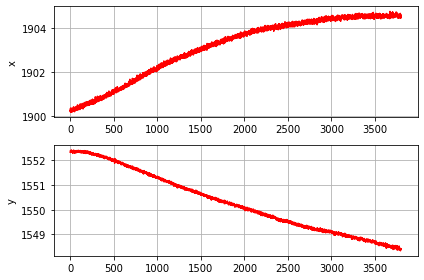

In [31]:
coms_highres = []
for i in tqdm(range(3800)):
    path = f"case_fix_advance_13_lumi/frame-{i:05d}.jpg"
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    com = ndimage.center_of_mass(img)
    coms_highres.append(com)
coms_highres = np.array(coms_highres)

plt.subplot(2, 1, 1)
plt.ylabel("x")
plt.plot(coms_highres[:,1], c="red")
plt.grid()
plt.subplot(2, 1, 2)
plt.ylabel("y")
plt.plot(coms_highres[:,0], c="red")
plt.grid()
plt.tight_layout()
plt.show()

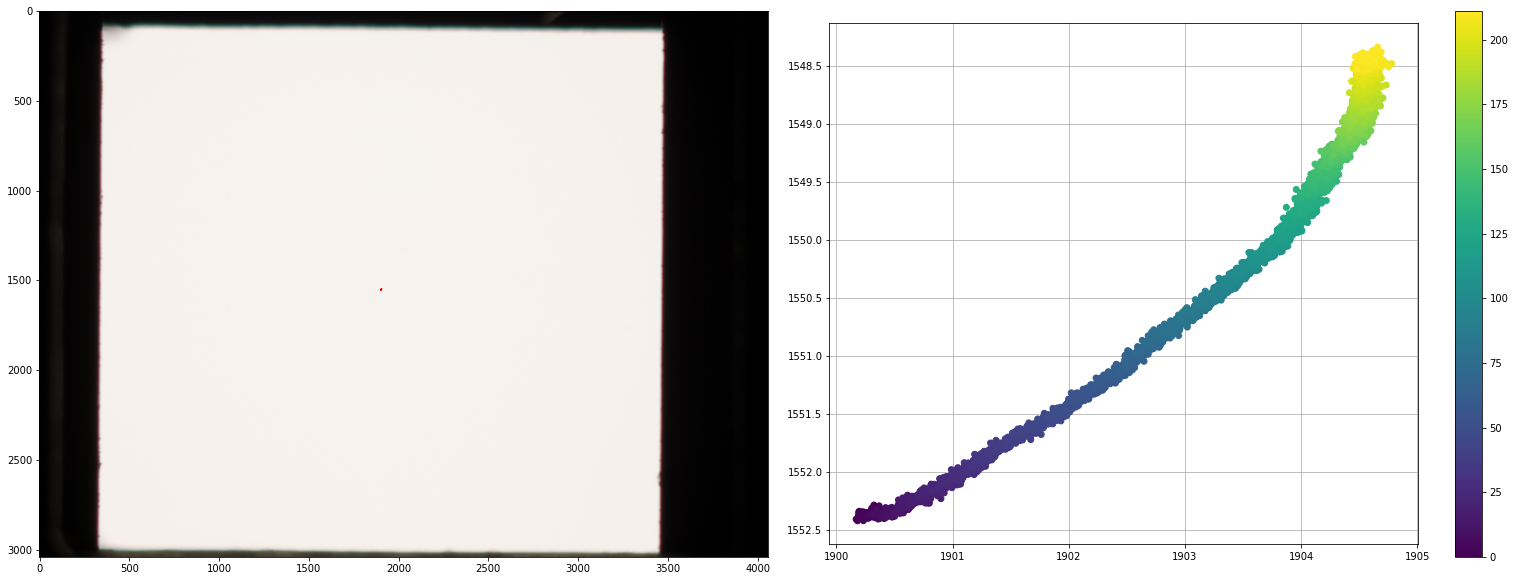

In [32]:
i = 0
path = f"case_fix_advance_13_lumi/frame-{i:05d}.jpg"
img = cv2.imread(path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(22,8))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.plot(coms_highres[:,1], coms_highres[:,0], c="red")
plt.subplot(1, 2, 2)
plt.scatter(coms_highres[:,1], coms_highres[:,0], c=np.array(range(3800))/18)
plt.gca().invert_yaxis()
plt.gca().set_aspect("equal", "box")
plt.grid()
plt.gca().set_axisbelow(True)
plt.colorbar()
plt.tight_layout()
plt.show()

100%|██████████| 3800/3800 [11:52<00:00,  5.33it/s]


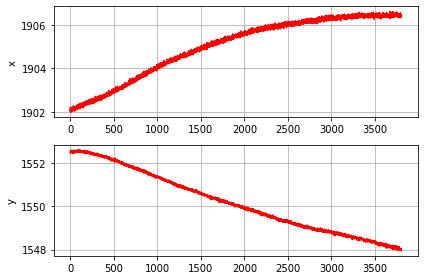

In [33]:
coms_highres = []
for i in tqdm(range(3800)):
    path = f"case_fix_advance_13_lumi/frame-{i:05d}.jpg"
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    threshold = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)[1]
    com = ndimage.center_of_mass(threshold)
    coms_highres.append(com)
coms_highres = np.array(coms_highres)

plt.subplot(2, 1, 1)
plt.ylabel("x")
plt.plot(coms_highres[:,1], c="red")
plt.grid()
plt.subplot(2, 1, 2)
plt.ylabel("y")
plt.plot(coms_highres[:,0], c="red")
plt.grid()
plt.tight_layout()
plt.show()

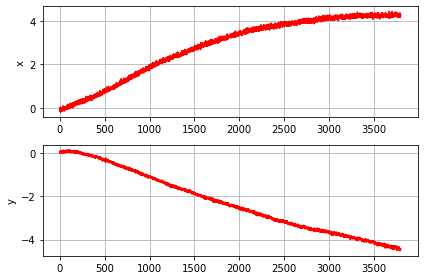

In [37]:
coms_highres_offset = coms_highres - coms_highres[0]

plt.subplot(2, 1, 1)
plt.ylabel("x")
plt.plot(coms_highres_offset[:,1], c="red")
plt.grid()
plt.subplot(2, 1, 2)
plt.ylabel("y")
plt.plot(coms_highres_offset[:,0], c="red")
plt.grid()
plt.tight_layout()
plt.show()

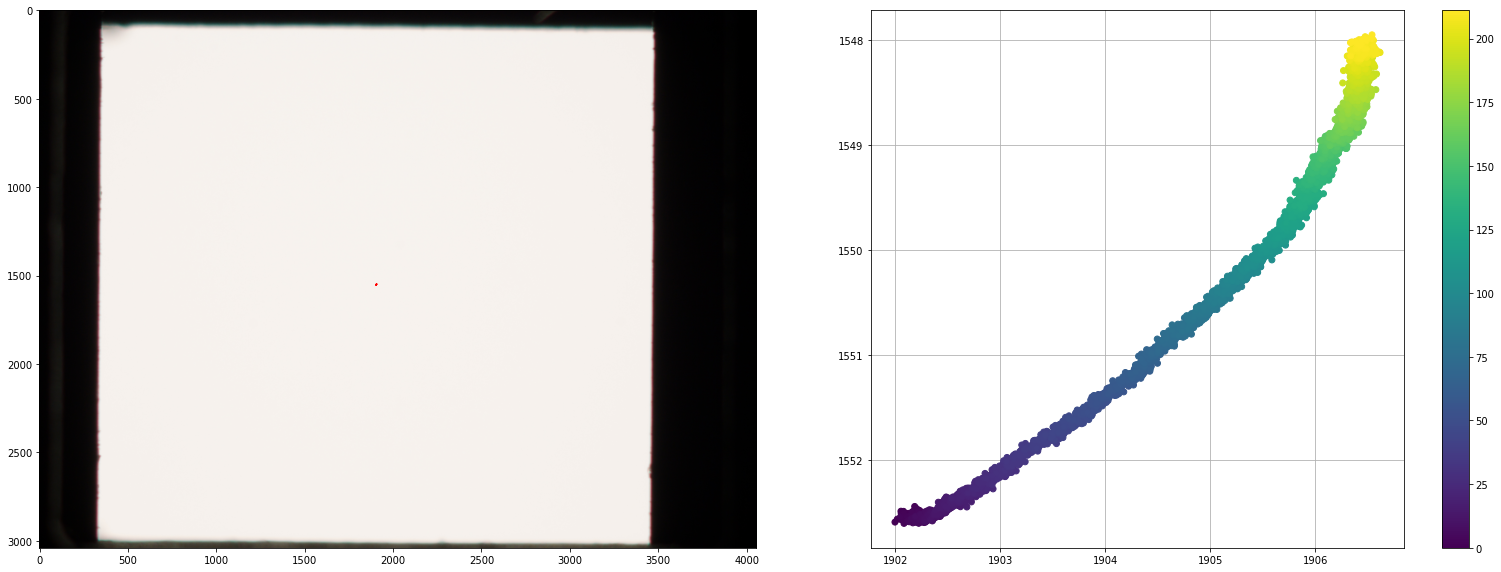

In [34]:
i = 0
path = f"case_fix_advance_13_lumi/frame-{i:05d}.jpg"
img = cv2.imread(path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(22,8))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.plot(coms_highres[:,1], coms_highres[:,0], c="red")
plt.subplot(1, 2, 2)
plt.scatter(coms_highres[:,1], coms_highres[:,0], c=np.array(range(3800))/18)
plt.gca().invert_yaxis()
plt.gca().set_aspect("equal", "box")
plt.grid()
plt.gca().set_axisbelow(True)
plt.colorbar()
plt.tight_layout()
plt.show()

100%|██████████| 3800/3800 [12:15<00:00,  5.17it/s]


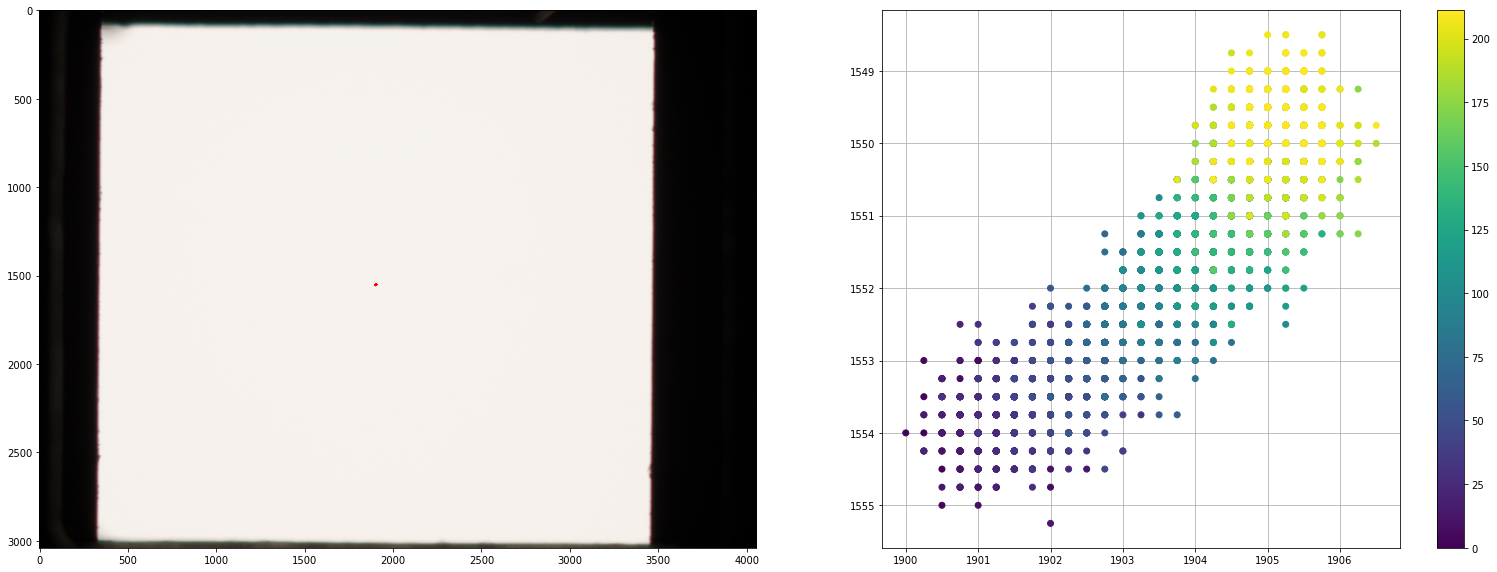

In [35]:
positions = []
for i in tqdm(range(3800)):
    path = f"case_fix_advance_13_lumi/frame-{i:05d}.jpg"
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    threshold = cv2.threshold(bw, 150, 255, cv2.THRESH_BINARY)[1]
    contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key=cv2.contourArea)
    perimeter = cv2.arcLength(contour, True)
    poly = cv2.approxPolyDP(contour, 0.01*perimeter, True)
    pos = (poly.squeeze()[:,1].mean(), poly.squeeze()[:,0].mean())

    positions.append(pos)
positions = np.array(positions)

i = 0
path = f"case_fix_advance_13_lumi/frame-{i:05d}.jpg"
img = cv2.imread(path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(22,8))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.plot(positions[:,1], positions[:,0], c="red")
plt.subplot(1, 2, 2)
plt.scatter(positions[:,1], positions[:,0], c=np.array(range(3800))/18)
plt.gca().invert_yaxis()
plt.gca().set_aspect("equal", "box")
plt.grid()
plt.gca().set_axisbelow(True)
plt.colorbar()
plt.tight_layout()
plt.show()

/usr/local/Caskroom/miniconda/base/envs/8mm/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  # This is added back by InteractiveShellApp.init_path()


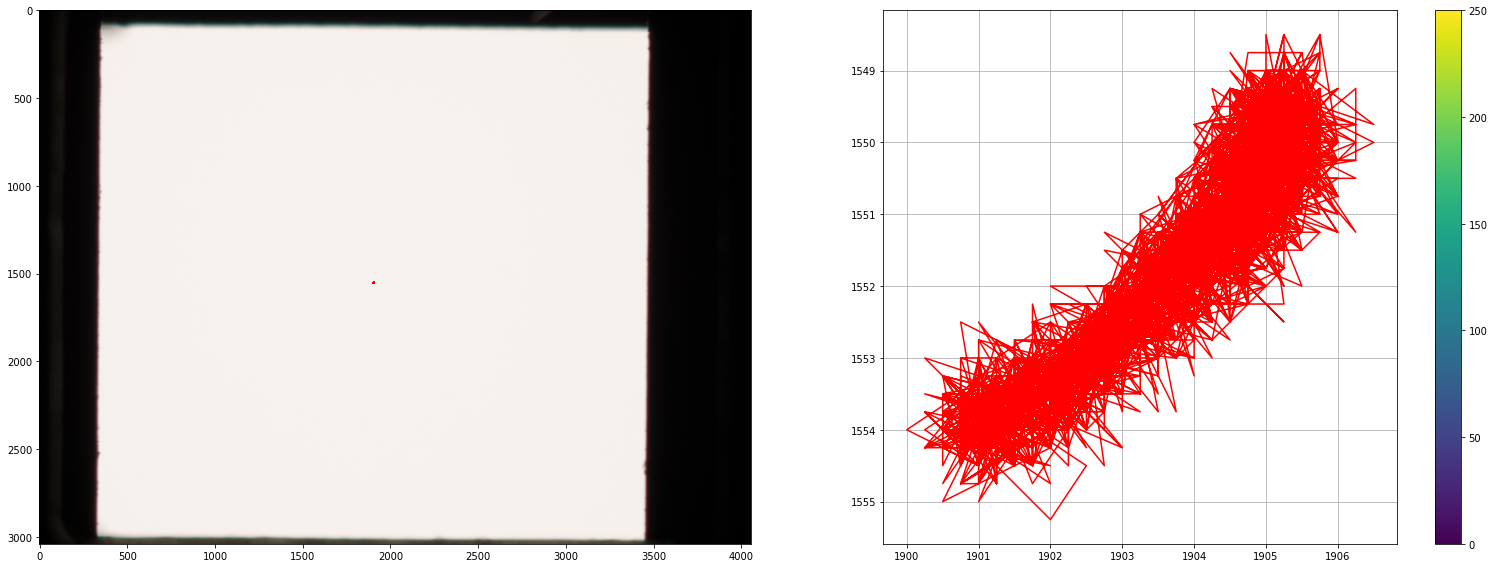

In [36]:
plt.figure(figsize=(22,8))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.plot(positions[:,1], positions[:,0], c="red")
plt.subplot(1, 2, 2)
plt.plot(positions[:,1], positions[:,0], c="red")
plt.gca().invert_yaxis()
plt.gca().set_aspect("equal", "box")
plt.grid()
plt.gca().set_axisbelow(True)
plt.colorbar()
plt.tight_layout()
plt.show()